In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Clustering_gmm.csv


# Gaussian Mixture Models Tutorials
* Gaussian Mixture Model is a distributed based model.
* GMM assumes that there are a certain number of gaussian distribution and each of these distributions represent a cluster. Hence, a gaussian mixture model tends to group the data point's belonging to a single distribution together. It is a probablistic model. 
* Mean and variance value of each gaussian is assigned through a technique called Expectation - Maximization. 
* EM is a statistical algorithm for finding the right model parameter.
* GMM takes into account the mean as well as the variance of the data.
* On the othe hand K-means only considers the mean.

In [2]:
data = pd.read_csv('../input/Clustering_gmm.csv')
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

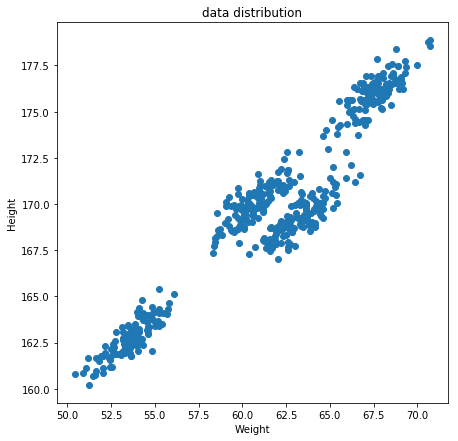

In [4]:
plt.figure(figsize=(7,7))
plt.scatter(data['Weight'], data['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('data distribution')
plt.show()

# First we build the k means model

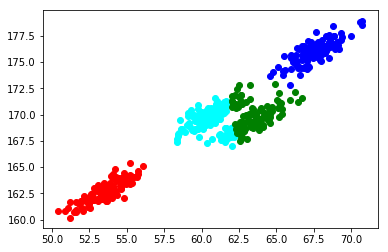

In [5]:
# training kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

# predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

# plotting results
color = ['red', 'blue', 'cyan', 'green']
for k in range(0,4):
    data = frame [frame['cluster'] == k]
    plt.scatter(data['Weight'], data['Height'], c=color[k])
plt.show()

* We can see that K means has failed to properly clasify the clusters. Kmeans has tried to build a circular cluster although the data distribution is elliptical. This is one of the major drawback's of Kmeans  

# Gaussian Mixture Models 

In [6]:
data = pd.read_csv('../input/Clustering_gmm.csv')
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


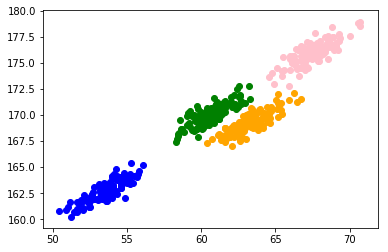

In [7]:
# training gaussian model 

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

# prediction of gmm

labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight','Height', 'cluster']

color = ['orange', 'blue', 'pink', 'green']

for k in range (0,4):
    data = frame[frame['cluster'] == k]
    plt.scatter(data['Weight'], data['Height'], c=color[k])
plt.show()

* Great, We have got the clusters as we wanted. 

### Please do upvote if you liked the Kernel